In [1]:
import os
import numpy as np
import pandas as pd
import random
import glob
import matplotlib.pyplot as plt
import cv2
import IPython
import soundfile as sf
import sys
sys.path.append("../")
from dataloaders.audiodataset import AudioDataset
from tqdm import tqdm
import sklearn


In [2]:
GENERATED_SAMPLES = "/Users/test/Documents/Projects/Master/nips4bplus/cleaned_train"
SR=22050

In [3]:

def play_audio(y, sr):
    return IPython.display.display(IPython.display.Audio(y, rate=sr))


## Protocol 1

In [4]:
OUT_FOLDER_P1 = "/Users/test/Documents/Projects/Master/nips4bplus/MOS/protocol3"

In [5]:
out = []
for foldername in os.listdir(os.path.join(GENERATED_SAMPLES)):
    print(foldername)
    filepaths = glob.glob(os.path.join(GENERATED_SAMPLES, foldername, '*.npy'))
    real_samples = [x for x in filepaths if True not in  [ temp in x for temp in ['noise','interpolation','extrapolation']]]
    random.shuffle(real_samples)
    real_samples = real_samples[0:3]
    #Only keep 3 samples per class.

    generated_samples = set([x for x in filepaths if True in [ temp in x for temp in ['noise','interpolation','extrapolation']]])
    # print("Real samples", real_samples)
    # print("Generated samples",generated_samples)
    # filepaths = sorted(filepaths, key=lambda x: len(x), reverse=False)
    # random.shuffle(filepaths)
    for real_sample in real_samples:
        filename = os.path.basename(real_sample).split('-')[0]

        candidates = [generated_sample for generated_sample in generated_samples if filename in generated_sample]
        random.shuffle(candidates)
        out.append([os.path.basename(real_sample), real_sample.split(os.sep)[-2],'real'])
        for generated_sample in candidates[0:2]:
            out.append([os.path.join(generated_sample.split(os.sep)[-1]), real_sample.split(os.sep)[-2], 'fake'])
            generated_samples.remove(generated_sample)

len(out)

Turphi_song
Alaarv_song
Galcri_call
Parate_song
Erirub_song
.DS_Store
Cetcet_song
Serser_song
Sylcan_song
Turmer_call
Sylcan_call


90

In [6]:
random.shuffle(out)
df = pd.DataFrame.from_records(out, columns=['filename', 'classname', 'status(fake/real)'])
df['id'] = [i for i in range(len(df))]
df.to_csv("map_ground_truth.csv", index=False)
df.head()

filename    classname  \
0               nips4b_birds_trainfile188-fbb785.npy  Cetcet_song   
1   nips4b_birds_trainfile609-66b454-3_noise0.09.npy  Erirub_song   
2   nips4b_birds_trainfile165-c6ff1a-0_noise0.08.npy  Sylcan_call   
3  nips4b_birds_trainfile674-8c37ba-8_interpolati...  Serser_song   
4               nips4b_birds_trainfile007-fd3af3.npy  Parate_song   

  status(fake/real)  id  
0              real   0  
1              fake   1  
2              fake   2  
3              fake   3  
4              real   4

## Convert filenames id to samples.

0it [00:00, ?it/s]

(128, 172)
-100.0 -28.347778
Mel shape (128, 172)


1it [00:00,  1.15it/s]

(128, 172)
-97.19557 -20.993477
Mel shape (128, 172)


2it [00:01,  1.19it/s]

(128, 172)
-102.99016 -36.85787
Mel shape (128, 172)


3it [00:02,  1.17it/s]

(128, 172)
-102.240654 -42.83572
Mel shape (128, 172)


4it [00:03,  1.24it/s]

(128, 172)
-86.321884 -6.321885
Mel shape (128, 172)


5it [00:04,  1.20it/s]

(128, 172)
-92.80151 -29.516008
Mel shape (128, 172)


6it [00:04,  1.27it/s]

(128, 172)
-100.0 -29.210613
Mel shape (128, 172)


7it [00:05,  1.26it/s]

(128, 172)
-98.346375 -21.636597
Mel shape (128, 172)


8it [00:06,  1.29it/s]

(128, 172)
-88.04063 -10.461406
Mel shape (128, 172)


9it [00:07,  1.28it/s]

(128, 172)
-101.68172 -44.472973
Mel shape (128, 172)


10it [00:07,  1.24it/s]

(128, 172)
-92.90341 -12.90341
Mel shape (128, 172)


11it [00:08,  1.28it/s]

(128, 172)
-99.59867 -36.293137
Mel shape (128, 172)


12it [00:09,  1.30it/s]

(128, 172)
-96.76131 -25.387344
Mel shape (128, 172)


13it [00:10,  1.29it/s]

(128, 172)
-108.38626 -42.67875
Mel shape (128, 172)


14it [00:10,  1.31it/s]

(128, 172)
-100.0 -32.72537
Mel shape (128, 172)


15it [00:11,  1.30it/s]

(128, 172)
-102.71973 -28.500158
Mel shape (128, 172)


16it [00:12,  1.26it/s]

(128, 172)
-100.0 -39.971756
Mel shape (128, 172)


17it [00:13,  1.30it/s]

(128, 172)
-96.15268 -22.814512
Mel shape (128, 172)


18it [00:14,  1.33it/s]

(128, 172)
-102.42989 -42.847614
Mel shape (128, 172)


19it [00:14,  1.30it/s]

(128, 172)
-101.0217 -32.4294
Mel shape (128, 172)


20it [00:15,  1.34it/s]/Users/test/miniconda3/envs/scologan/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


(128, 172)
-99.727005 -32.001816
Mel shape (128, 172)


21it [00:16,  1.29it/s]

(128, 172)
-100.0 -39.43677
Mel shape (128, 172)


22it [00:17,  1.34it/s]

(128, 172)
-100.0 -28.615635
Mel shape (128, 172)


23it [00:17,  1.30it/s]

(128, 172)
-93.94915 -13.949151
Mel shape (128, 172)


24it [00:18,  1.34it/s]

(128, 172)
-97.02144 -25.843933
Mel shape (128, 172)


25it [00:19,  1.29it/s]

(128, 172)
-96.159424 -22.144464
Mel shape (128, 172)


26it [00:20,  1.34it/s]

(128, 172)
-102.866356 -16.668043
Mel shape (128, 172)


27it [00:20,  1.32it/s]

(128, 172)
-92.73531 -18.032335
Mel shape (128, 172)


28it [00:21,  1.37it/s]

(128, 172)
-78.494995 1.5050042
Mel shape (128, 172)


29it [00:22,  1.31it/s]

(128, 172)
-102.60655 -28.101711
Mel shape (128, 172)


30it [00:23,  1.27it/s]

(128, 172)
-101.93005 -37.357014
Mel shape (128, 172)


31it [00:23,  1.31it/s]

(128, 172)
-97.23103 -17.231035
Mel shape (128, 172)


32it [00:24,  1.19it/s]

(128, 172)
-95.83697 -15.836967
Mel shape (128, 172)


33it [00:25,  1.22it/s]

(128, 172)
-100.306946 -32.377617
Mel shape (128, 172)


34it [00:26,  1.20it/s]

(128, 172)
-100.0 -27.770836
Mel shape (128, 172)


35it [00:27,  1.25it/s]

(128, 172)
-91.06342 -11.063421
Mel shape (128, 172)


36it [00:28,  1.25it/s]

(128, 172)
-101.067085 -42.625378
Mel shape (128, 172)


37it [00:29,  1.20it/s]

(128, 172)
-96.46183 -16.783598
Mel shape (128, 172)


38it [00:29,  1.21it/s]

(128, 172)
-101.05418 -38.282455
Mel shape (128, 172)


39it [00:30,  1.24it/s]

(128, 172)
-100.0 -27.027456
Mel shape (128, 172)


40it [00:31,  1.19it/s]

(128, 172)
-85.113464 -9.143358
Mel shape (128, 172)


41it [00:32,  1.15it/s]

(128, 172)
-108.1848 -23.89725
Mel shape (128, 172)


42it [00:33,  1.12it/s]

(128, 172)
-97.86696 -32.66891
Mel shape (128, 172)


43it [00:34,  1.15it/s]

(128, 172)
-96.199814 -16.19981
Mel shape (128, 172)


44it [00:35,  1.10it/s]

(128, 172)
-107.78386 -18.272161
Mel shape (128, 172)


45it [00:36,  1.15it/s]

(128, 172)
-96.404625 -27.704514
Mel shape (128, 172)


46it [00:36,  1.16it/s]

(128, 172)
-100.94888 -32.514706
Mel shape (128, 172)


47it [00:37,  1.21it/s]

(128, 172)
-100.0 -40.940598
Mel shape (128, 172)


48it [00:38,  1.22it/s]

(128, 172)
-101.84592 -27.009466
Mel shape (128, 172)


49it [00:39,  1.16it/s]

(128, 172)
-99.24227 -15.729052
Mel shape (128, 172)


50it [00:40,  1.19it/s]

(128, 172)
-100.0 -23.686714
Mel shape (128, 172)


51it [00:40,  1.24it/s]

(128, 172)
-103.21742 -31.75461
Mel shape (128, 172)


52it [00:41,  1.20it/s]

(128, 172)
-102.339355 -31.022062
Mel shape (128, 172)


53it [00:42,  1.24it/s]

(128, 172)
-102.74334 -22.79127
Mel shape (128, 172)


54it [00:43,  1.26it/s]

(128, 172)
-99.57526 -19.575254
Mel shape (128, 172)


55it [00:44,  1.28it/s]

(128, 172)
-100.0 -22.683022
Mel shape (128, 172)


56it [00:44,  1.24it/s]

(128, 172)
-94.43086 -14.430865
Mel shape (128, 172)


57it [00:45,  1.24it/s]

(128, 172)
-84.84807 -10.534309
Mel shape (128, 172)


58it [00:46,  1.25it/s]

(128, 172)
-101.40144 -26.79315
Mel shape (128, 172)


59it [00:47,  1.27it/s]

(128, 172)
-100.0 -40.854496
Mel shape (128, 172)


60it [00:48,  1.23it/s]

(128, 172)
-102.56701 -28.691484
Mel shape (128, 172)


61it [00:48,  1.22it/s]

(128, 172)
-98.67635 -30.068481
Mel shape (128, 172)


62it [00:49,  1.25it/s]

(128, 172)
-100.0 -23.07713
Mel shape (128, 172)


63it [00:50,  1.28it/s]

(128, 172)
-101.43734 -34.403194
Mel shape (128, 172)


64it [00:51,  1.24it/s]

(128, 172)
-101.072624 -45.90509
Mel shape (128, 172)


65it [00:52,  1.26it/s]

(128, 172)
-95.64831 -14.252296
Mel shape (128, 172)


66it [00:52,  1.26it/s]

(128, 172)
-101.200096 -45.713608
Mel shape (128, 172)


67it [00:53,  1.27it/s]

(128, 172)
-100.0 -23.412245
Mel shape (128, 172)


68it [00:54,  1.23it/s]

(128, 172)
-94.89395 -14.893952
Mel shape (128, 172)


69it [00:55,  1.24it/s]

(128, 172)
-100.0 -26.082506
Mel shape (128, 172)


70it [00:56,  1.28it/s]

(128, 172)
-101.020515 -36.399532
Mel shape (128, 172)


71it [00:56,  1.31it/s]

(128, 172)
-104.24387 -45.50875
Mel shape (128, 172)


72it [00:57,  1.23it/s]

(128, 172)
-102.32428 -43.515194
Mel shape (128, 172)


73it [00:58,  1.25it/s]

(128, 172)
-102.875244 -39.91941
Mel shape (128, 172)


74it [00:59,  1.22it/s]

(128, 172)
-98.167915 -19.623209
Mel shape (128, 172)


75it [01:00,  1.22it/s]

(128, 172)
-95.35718 -15.357176
Mel shape (128, 172)


76it [01:00,  1.22it/s]

(128, 172)
-100.0 -39.36806
Mel shape (128, 172)


77it [01:01,  1.25it/s]

(128, 172)
-101.60848 -32.331615
Mel shape (128, 172)


78it [01:02,  1.20it/s]

(128, 172)
-100.0 -21.953331
Mel shape (128, 172)


79it [01:03,  1.21it/s]

(128, 172)
-80.355194 -1.9573237
Mel shape (128, 172)


80it [01:04,  1.19it/s]

(128, 172)
-100.47969 -37.051437
Mel shape (128, 172)


81it [01:05,  1.21it/s]

(128, 172)
-103.019455 -43.50408
Mel shape (128, 172)


82it [01:06,  1.16it/s]

(128, 172)
-99.52515 -34.00056
Mel shape (128, 172)


83it [01:06,  1.18it/s]

(128, 172)
-101.79289 -50.14621
Mel shape (128, 172)


84it [01:07,  1.16it/s]

(128, 172)
-107.89206 -22.322702
Mel shape (128, 172)


85it [01:08,  1.20it/s]

(128, 172)
-98.051285 -18.051289
Mel shape (128, 172)


86it [01:09,  1.23it/s]

(128, 172)
-94.42819 -23.764841
Mel shape (128, 172)


87it [01:10,  1.25it/s]

(128, 172)
-95.37937 -21.938185
Mel shape (128, 172)


88it [01:11,  1.18it/s]

(128, 172)
-99.57578 -16.629822
Mel shape (128, 172)


89it [01:11,  1.15it/s]

(128, 172)
-93.8325 -14.8538685
Mel shape (128, 172)


90it [01:12,  1.24it/s]


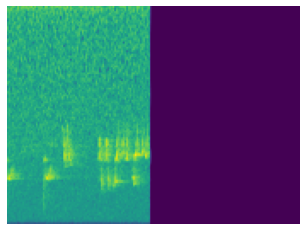

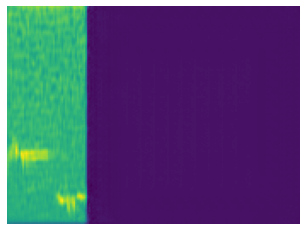

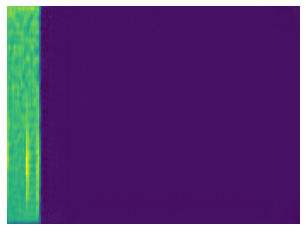

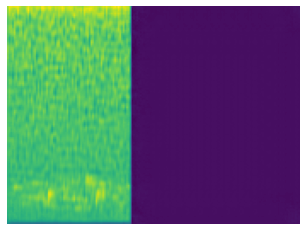

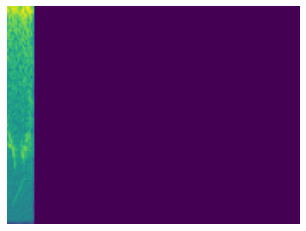

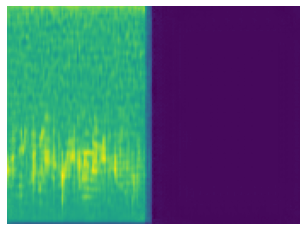

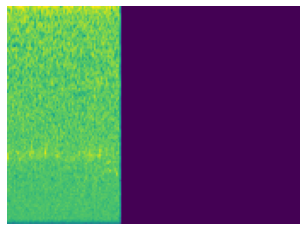

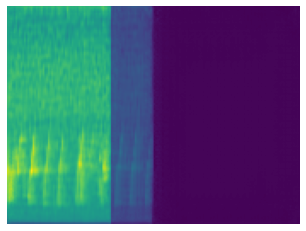

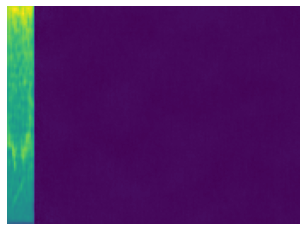

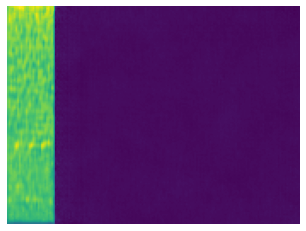

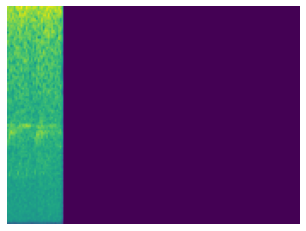

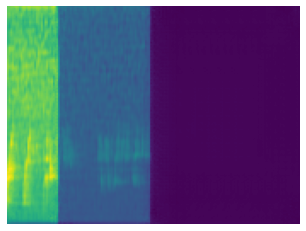

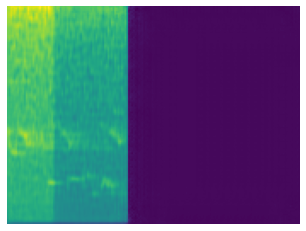

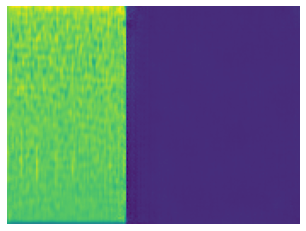

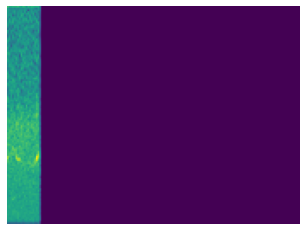

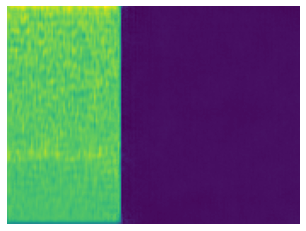

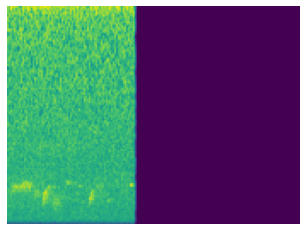

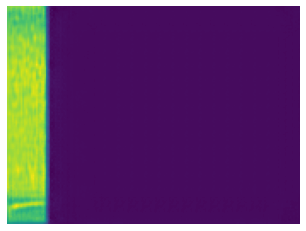

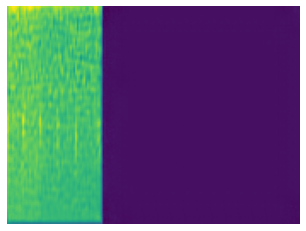

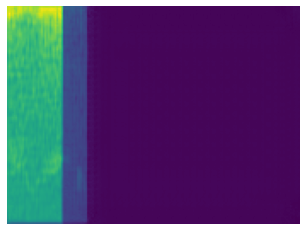

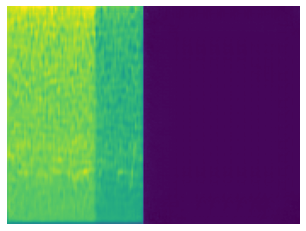

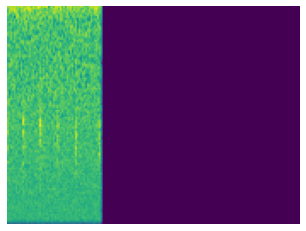

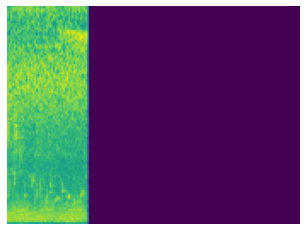

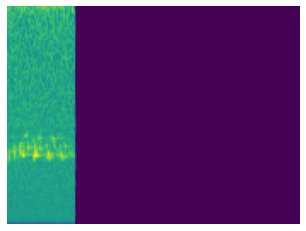

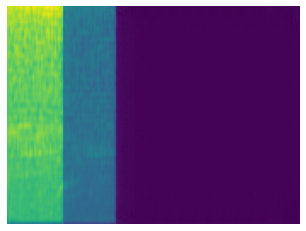

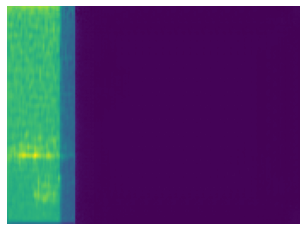

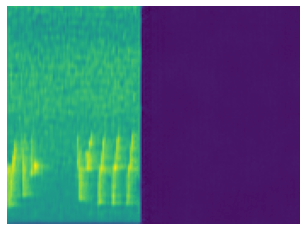

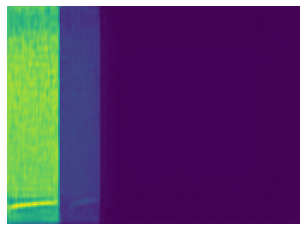

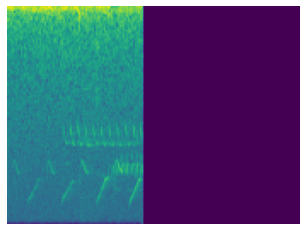

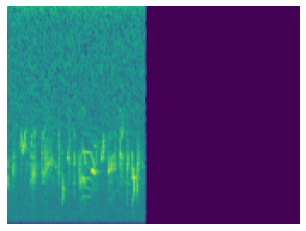

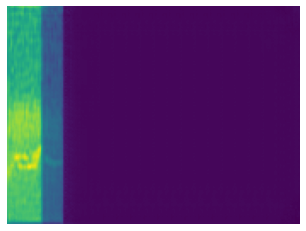

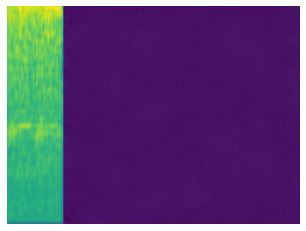

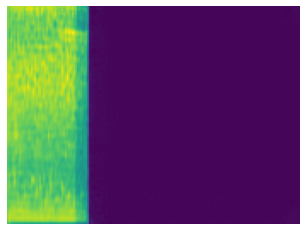

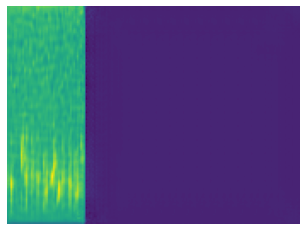

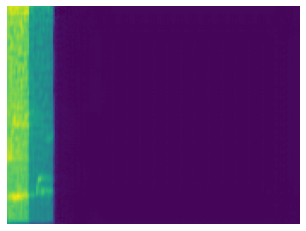

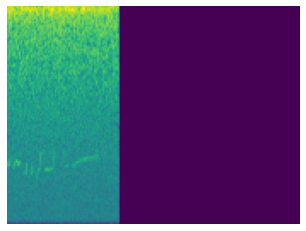

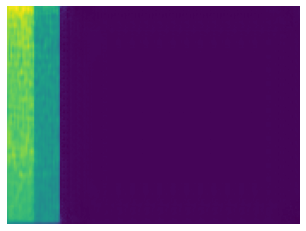

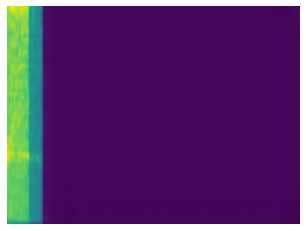

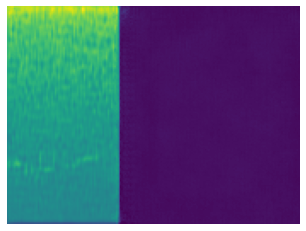

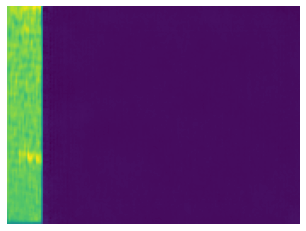

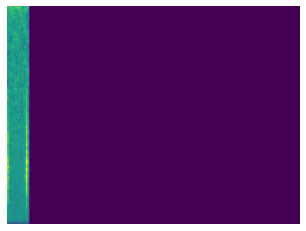

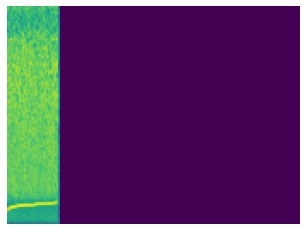

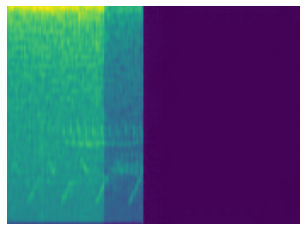

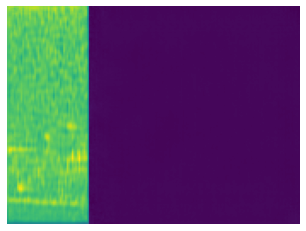

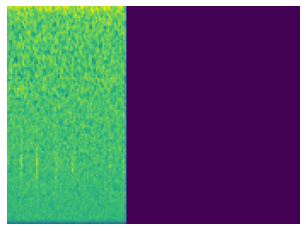

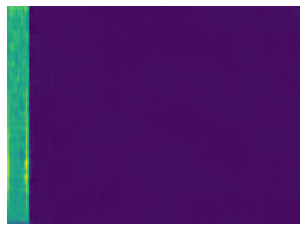

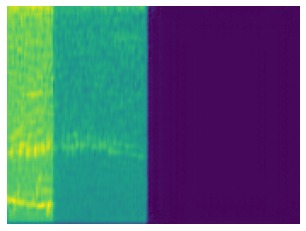

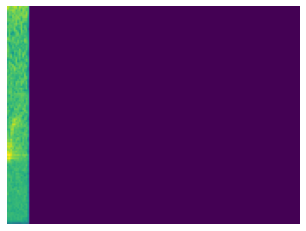

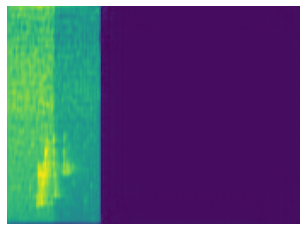

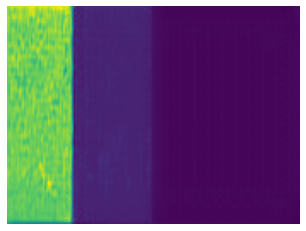

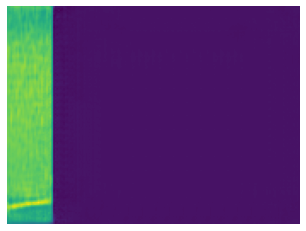

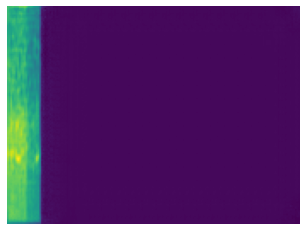

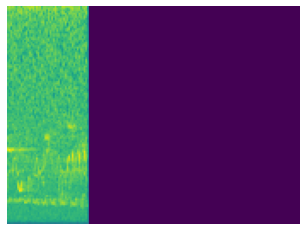

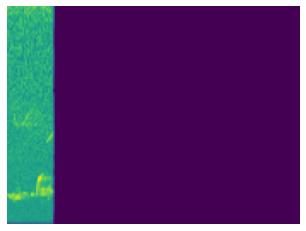

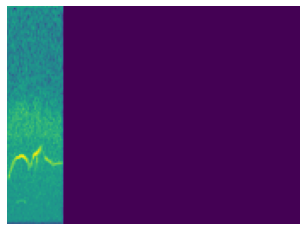

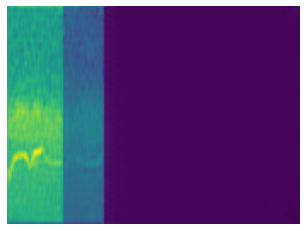

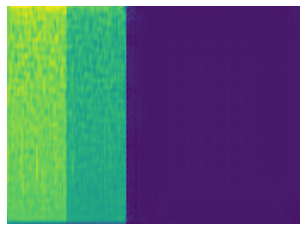

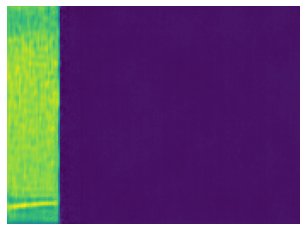

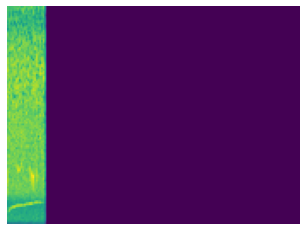

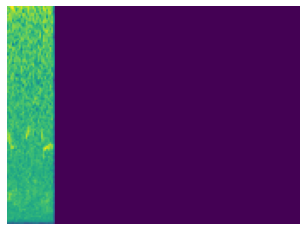

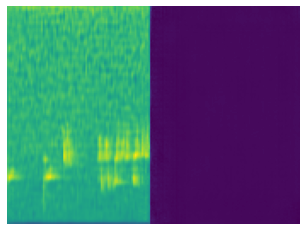

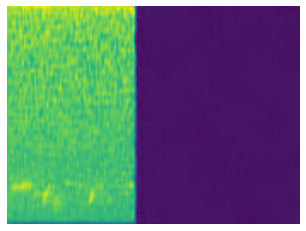

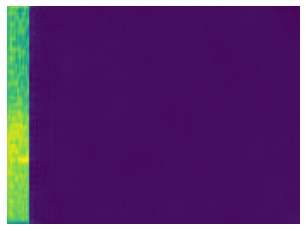

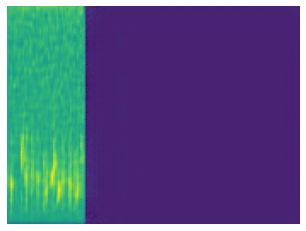

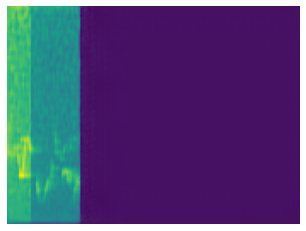

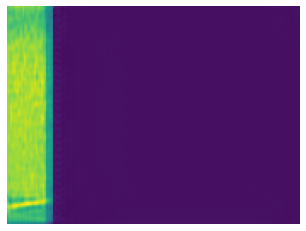

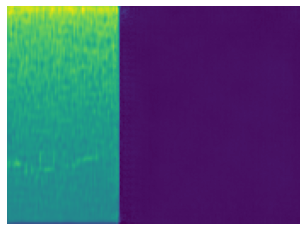

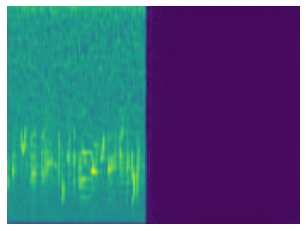

In [12]:
for i, row in tqdm(df.iterrows()):
    outfile = os.path.join(OUT_FOLDER_P1, row['classname'], str(row['filename'])+ ".{}")
    os.makedirs(os.path.dirname(outfile), exist_ok=True)
    sample = np.load(os.path.join(GENERATED_SAMPLES, row['classname'], row['filename']))
    print(sample.shape)
    fig = plt.figure()
    plt.axis('off')
    plt.imshow(sample)
    fig.savefig(outfile.format("png"))
    print(sample.min(), sample.max())
    # sample = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 250.0)).fit_transform(sample)
    # sample = np.transpose(sample[None], (1,2,0))
    audio = AudioDataset.mel_spectrogram_to_audio(sample, resize=False)
    # play_audio(audio, SR)
    sf.write(outfile.format('.wav'), audio, SR, subtype='PCM_24')
    # if i > 5:
        # break
    # break